# Image Analysis

In [134]:
# basic imports and notebook configurations
# standard Python modules
import logging
import os
import sys

# additional Python modules
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

# own python modules
from methods import *
from fingers import *

# %aimport analyis
#importlib.reload(influx_db)
#importlib.reload(plot_tools)
plt.style.use('classic')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## logging configuration

In [135]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')
log = logging.getLogger(os.path.splitext(os.path.basename(sys.argv[0]))[0])
log.setLevel(logging.INFO)

### Development setup

2023-06-19 15:49:12,532 - INFO - methods.py - get_image_files - Found 384 images for case 0.1spacer_0.5ml2
2023-06-19 15:49:12,939 - INFO - methods.py - get_image_files - Found 384 images for case 0.1spacer_0.5ml2
2023-06-19 15:49:12,941 - INFO - methods.py - multi_contour_plot - Creating multi contour image for case 0.1spacer_0.5ml2 at times [40, 160, 360]
2023-06-19 15:49:13,026 - INFO - methods.py - get_image_files - Found 371 images for case 0.1spacer_0.5ml2


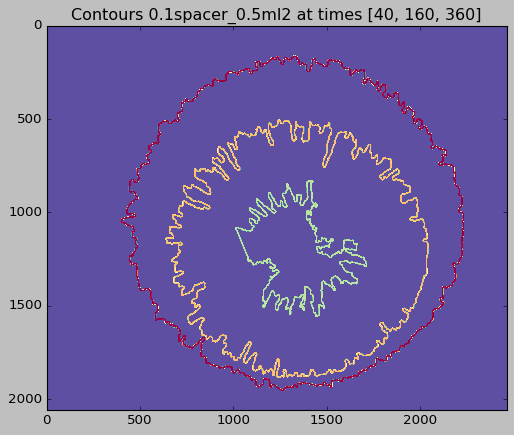

In [136]:
# read config
config = get_config()
# get dev case
cases = config["cases"]
# get image name
for cas in cases:

    tmp_conf = config.copy()
    tmp_conf["images"] = []
    background_images = get_image_files(tmp_conf, cas, "png_cases")
    if background_images == []:
        background_images = get_image_files(tmp_conf, cas, "raw_cases")
    if background_images == []:
        logging.warning(f"No images found for case {cas}")
        continue

    background_img = get_base_image(config, cas, background_images[0])

    images = get_image_files(config, cas, "png_cases")
    # for img in images:
        # process_image(img, config, cas, background_img)
    multi_contour_plot()